    
    1. Understanding the Bussiness problem
    2. Loading and understanding the Data
    3. Exploratory Data Analysis(EDA)
        a.Descriptive Statistics
        b.Data Visualization
    4. Data PreProcessing
        a.Identifiying Num and Cat data and converting them to appropriate dtype
        b.Dectecting the outliers and removing them after scaling
        c.Data Wrangling or Data cleaning(Imputation)
                (If more than 25% of the data is missing orelse remove those rows)
        d.label Encoding the target variable (if categorical)
            i)creating dummies for categorical attributes
        e.Scaling the data
   

## 1.UNDERSTANDING THE BUSSINESS PROBLEM

In [2]:
import numpy as np
import pandas as pd


In [3]:
data=pd.read_csv('insurance.csv')

****************************************************

## 2. LOADING AND UNDERSTANDING THE DATA 
    

In [4]:
#data.head()
#data.shape
#data.info()
#data.dtypes()

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

****************************************************

## 3.EXPLORATORY DATA ANALYSIS 
		

###### Descriptive statistics – Mean, median, Standard deviation, etc.

In [9]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


###### Data visualization – A) Uniariate - Histogram /Density plots,Box plots,Count plot of target column(if categorical), B) Multivariate- Correlation plots 

C:\Users\metti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


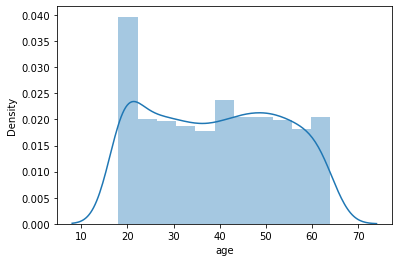

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# a)univariate plots

# Histogram/Density plot
sns.distplot(a=data.age)
plt.show()



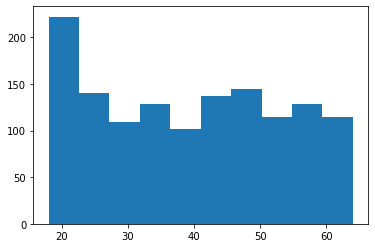

In [11]:
#boxplot


plt.hist(data.age)
plt.show()

C:\Users\metti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


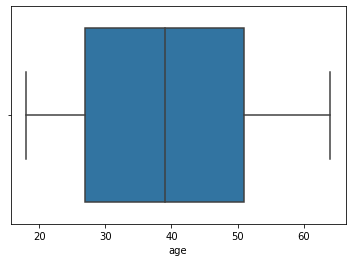

In [12]:
sns.boxplot(data.age)
plt.show()

In [13]:
#countplot of the target variable if categorical
#or Check for the frequency Distribution of the target variable


# d = data.loc[(data['age']<70),]
q1=np.percentile(data['age'],25)
q3=np.percentile(data['age'],75)
iqr=q3-q1

lower=np.where(data['age']<=q1-iqr*1.5)
upper=np.where(data['age']>=q3+iqr*1.5)

data.drop(lower[0],inplace=True)
data.drop(upper[0],inplace=True)

C:\Users\metti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

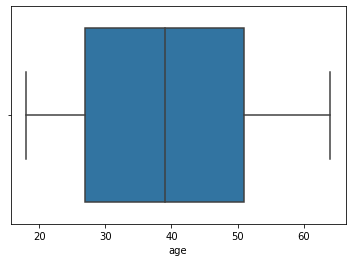

In [14]:
d=data.loc[(data['age']<70),]
sns.boxplot(d.age)

C:\Users\metti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges', ylabel='count'>

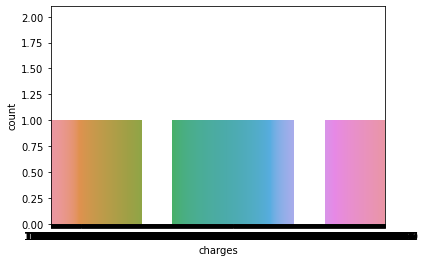

In [17]:
# b)Multivariate

#corelation heatmap

sns.countplot(data.charges)


<AxesSubplot:>

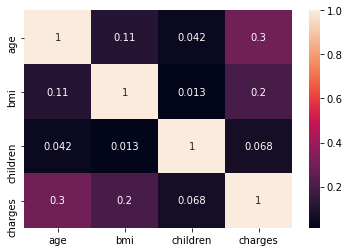

In [18]:
sns.heatmap(data.corr(),cbar=True,annot=True)

*********************************************************************

## 4.DATA PREPROCESSING

###### a)Identify categorical and numerical features and converting them to appropriate Datatype


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


###### b)Detecting outliers and Dropping the outliers based on data analysis

In [20]:
#Detecting and removing outliers
# cat=[job', 'marital', 'education', 'default','housing','loan', 'contact', 'month','poutcome', 'y']
# cat= cat.astypes('O')
# num=['age','balance', 'duration', 'campaign', 'pdays', 'previous']
# num_data=num.
cat_att= [var for var in data.columns if data[var].dtype=='O']
cat_att
data[cat_att].apply(lambda col: col.astype('category'))






,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [21]:
num_att= [v for v in data.columns if data[v].dtype=='int64']
num_att
data[num_att].apply(lambda c: c.astype('float64'))

,age,children
0,19.0,0.0
1,18.0,1.0
2,28.0,3.0
3,33.0,0.0
4,32.0,0.0
...,...,...
1333,50.0,3.0
1334,18.0,0.0
1335,18.0,0.0
1336,21.0,0.0


###### c)data wrangling or data cleaning.
		Filling missing values only if 25% of the data is missing
        

### Imputation

************************************************

###### ---->For categorical attributes:-



###### ----> Lable encoding -----> If the column is ordinal eg: small / medium / large ==> 0 / 1 / 2

In [22]:
# Apply label encoder to each column with categorical data
from sklearn.preprocessing import LabelEncoder




###### ----> One hot encoding -----> If there is no order in the data eg: state (Hyd/ Blr / Chn)-> Hyd(0/1) -> Blr (0/1) -> chn (0/1)

In [23]:
from sklearn.preprocessing import OneHotEncoder





###### ----> Filling missing values with mode of the column in value

In [25]:
# Filling missing values in categorical variables:

impute_cat = SimpleImputer(strategy='most_frequent')
impute_cat.fit(data[cat_att])
data_cat = pd.DataFrame(impute_cat.transform(data[cat_att]), columns=cat_att)

In [26]:
# Filling missing values by median


impute_num = SimpleImputer(strategy='mean')
impute_num.fit(data[num_att])

data_num = pd.DataFrame(impute_num.transform(data[num_att]), columns=num_att)



In [28]:
le = LabelEncoder()

data.y = le.fit_transform(data.charges)

<ipython-input-28-0b96b63f62da>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.y = le.fit_transform(data.charges)


###### ---->Simple Imputation

In [ ]:
# for categorical attributes




#  for Numerical attributes(with median)







###### d)label Encoding the target variable (if categorical)

In [ ]:
# i)creating dummies for categorical attributes







###### e)Perform the scaling of the features

In [ ]:
#standard scaler/MinMax scaler for the numerical features




